## Sentiment Analysis - Roger Federer vs Rafael Nadal Final Match

Sentiment Analysis on Twitter data for tomorrow's Shanghai Masters Final 2017. Python-twitter Api has been used to get data. Textblob for NLP and calculating sentiment of the tweets.

In [1]:
import twitter
import json
import pandas as pd
import base64

%matplotlib inline

In [ ]:
# Variables that contains the user credentials to access Twitter API
ACCESS_TOKEN_KEY      =    '##########################'
ACCESS_TOKEN_SECRET   =    '##########################'
CONSUMER_KEY          =    '##########################'
CONSUMER_SECRET       =    '##########################'

In [8]:
# Initiate the connection to Twitter Streaming API
#twitter_stream = TwitterStream(auth=oauth)

api = twitter.Api(consumer_key = CONSUMER_KEY,
                  consumer_secret = CONSUMER_SECRET,
                  access_token_key = ACCESS_TOKEN_KEY,
                  access_token_secret = ACCESS_TOKEN_SECRET)

In [9]:
import re
from textblob import TextBlob

def clean_tweet(tweet):
    '''
    Utility function to clean tweet text by removing links, special characters
    using simple regex statements.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split())

def get_tweet_sentiment(tweet):
    '''
    Utility function to classify sentiment of passed tweet
    using textblob's sentiment method
    '''
    # create TextBlob object of passed tweet text
    analysis = TextBlob(clean_tweet(tweet))
    # set sentiment
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'
    
def get_min_max(tweets):
    ids = []
    for tweet in tweets:
        # print tweet
        if type(tweet) is list:
            tweet = tweet[0]
        ids.append(tweet.id)
    min_id = min(ids)
    max_id = max(ids)
    return min_id, max_id
    
def get_tweets(term, count):
    all_tweets = []
    max_id = 843567375765159939000000
    #print max_id
    loop_count = int(count / 100)
    for i in range(loop_count):
        tweets = api.GetSearch(term=term, count = 100)
        #print 'Total number of tweets found - '  +  str(len(tweets))
        try:
            min_id, max_id = get_min_max(tweets)
            all_tweets = all_tweets + tweets
        except:
            print ('something wrong')
            pass
    return all_tweets
  

def get_tweets_df(tweets):
    result = []
    for tweet in tweets:
        favorite_count = tweet.favorite_count
        retweet_count = tweet.retweet_count
        source = tweet.source
        text = tweet.text
        urls = tweet.urls
        sentiment = get_tweet_sentiment(text)
        
        result.append({
            #'text': base64.b64encode(text.encode('ascii', 'ignore').decode('ascii')),
            'text': text.encode('ascii', 'ignore').decode('ascii'),
            'Sentiment': sentiment,
            'Likes' : favorite_count,
            'Retweets' : retweet_count,
            'Followers': tweet.user.followers_count,
            'Tweeter-Handle' : tweet.user.screen_name.encode('ascii', 'ignore').decode('ascii'),
            'user_name': tweet.user.name.encode('ascii', 'ignore').decode('ascii'),
        })
    result_df = pd.DataFrame(result)
    return result_df

def print_tweet(tweet):
    print ('---- Printing tweet ----')
    print (tweet.favorite_count)
    print (tweet.text)
    print (' --------- x --------- ')

In [10]:
print ('Fetching tweets for Roger Federer')
tweets_federer = get_tweets('Federer', 2000)
print ('Total number of tweets fetched = ' + str(len(tweets_federer)))

print ('Fetching tweets for Rafael Nadal')
tweets_nadal = get_tweets('Nadal', 2000)
print ('Total number of tweets fetched = ' + str(len(tweets_nadal)))

Fetching tweets for Roger Federer
Total number of tweets fetched = 2000
Fetching tweets for Rafael Nadal
Total number of tweets fetched = 2000


In [11]:
df_federer = get_tweets_df(tweets_federer)
df_nadal = get_tweets_df(tweets_nadal)

df_federer.to_csv('federer.csv')
df_nadal.to_csv('nadal.csv')

sentiment_federer = df_federer.groupby(['Sentiment'])[['Sentiment']].count()
sentiment_federer.rename(columns={'Sentiment': 'Federer'}, inplace=True)

sentiment_nadal = df_nadal.groupby(['Sentiment'])[['Sentiment']].count()
sentiment_nadal.rename(columns={'Sentiment': 'Nadal'}, inplace=True)

#Concatenate the results df
stats = pd.concat([sentiment_federer, sentiment_nadal] ,axis=1, join='inner')

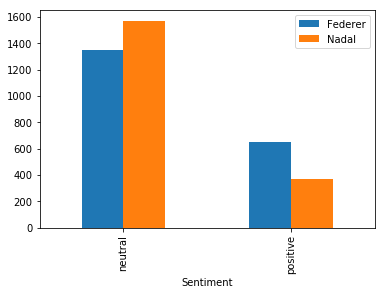

In [12]:
stats.plot(kind='bar')

None of the tweet are negative that probably shows the respects that both player have from the other player's fans.

In [13]:
stats

,Federer,Nadal
Sentiment,,
neutral,1353,1573
positive,647,367
